In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML
import pprint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LassoCV, ElasticNetCV, RidgeCV, LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import datetime
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score, adjusted_mutual_info_score
from selenium import webdriver
import os
import requests
from bs4 import BeautifulSoup
import json

# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

### NLP
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from sklearn.pipeline import make_pipeline

In [2]:
filepath = './dataset.csv'

In [3]:
df = pd.read_csv(filepath)
df

,Unnamed: 0,Url,Job_Title,Company_Name,Industry,Commitment,Address,Seniority,Salary_Range,Salary_Period,Posting_Date,Closing_Date,Roles_And_Responsibilities,Requirements,About_The_Company,Govt_Support
0,0,https://www.mycareersfuture.sg/job/data-scient...,Data Scientist,SINGAPORE POWER LIMITED,Information Technology,Full Time,"SP GROUP BUILDING, 2 KALLANG SECTOR 349277",Professional,"$4,000to$8,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nWhy Work for Us\r\...,Requirements\r\nWhat You'll Need\r\nWe are loo...,About the Company\r\nSINGAPORE POWER LIMITED\r...,Government support available\r\nCareer Support...
1,1,https://www.mycareersfuture.sg/job/senior-data...,Senior Data Scientist,SINGAPORE POWER LIMITED,Information Technology,Full Time,"SP GROUP BUILDING, 2 KALLANG SECTOR 349277",Middle Management,"$8,000to$14,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nWhy Work for Us\r\...,Requirements\r\nWhat You'll Need\r\nWe are loo...,About the Company\r\nSINGAPORE POWER LIMITED\r...,Government support available\r\nCareer Support...
2,2,https://www.mycareersfuture.sg/job/data-direct...,Data Director,TBWA SINGAPORE PTE LTD,Advertising / Media,"Permanent, Full Time",991C ALEXANDRA ROAD 119971,"Manager, Professional","$8,000to$15,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nWhat does a Data D...,Requirements\r\nSkills and Experience required...,About the Company\r\nTBWA\Worldwide (www.tbwa....,Government support available\r\nCareer Support...
3,3,https://www.mycareersfuture.sg/job/head-data-e...,Head of Data Engineering,FIXED & MOBILE PTE. LTD.,Information Technology,"Permanent, Full Time","ANSON HOUSE, 72 ANSON ROAD 079911",Senior Management,"$8,000to$11,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nTransferTo operate...,Requirements\r\nEssential Experience\r\nMore t...,About the Company\r\nFIXED & MOBILE PTE. LTD.\...,Government support available\r\nCareer Support...
4,4,https://www.mycareersfuture.sg/job/senior-assi...,"Senior Assistant Manager (Librarian), Research...",NANYANG TECHNOLOGICAL UNIVERSITY,"Education and Training, Information Technology","Contract, Full Time","NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...","Manager, Professional","$4,500to$5,500",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nNTU Library invite...,Requirements\r\nRequirements\r\nBachelor’s deg...,About the Company\r\nWorld's Top Young Univers...,Error
5,5,https://www.mycareersfuture.sg/job/data-scient...,Data Scientist - Information Technology,NOMURA SINGAPORE LIMITED,Banking and Finance,Full Time,"MARINA BAY FINANCIAL CENTRE, 10 MARINA BOULEVA...",Professional,"$20,800to$33,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nNomura Overview \...,Requirements\r\nKey Experience & Skills \r\nS...,About the Company\r\nNomura is a leading finan...,Error
6,6,https://www.mycareersfuture.sg/job/manager-fut...,Manager - Future of Work (Data Science),DELOITTE CONSULTING PTE. LTD.,Consulting,Permanent,"OUE DOWNTOWN, 6 SHENTON WAY 068809",Manager,"$7,000to$14,000",Monthly,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nWhat impact will y...,Requirements\r\nMS or higher in computer scien...,About the Company\r\nDELOITTE CONSULTING PTE. ...,Government support available\r\nCareer Support...
7,7,https://www.mycareersfuture.sg/job/data-scient...,Data Scientist,SPOTIFY SINGAPORE PTE. LTD.,Others,Permanent,"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Executive,"$90,000to$110,000",Annually,Posted 28 Jan 2019,Closing on 27 Feb 2019,Roles & Responsibilities\r\nWe seek an outstan...,Requirements\r\nWho you are\r\nDegree in Compu...,"About the Company\r\nAt Spotify, we’re passion...",Error
8,8,https://www.mycareersfuture.sg/job/senior-engi...,"Senior Engineer / Engineer, Data Centre Facili...",STARHUB LTD.,Engineering,"Permanent, Full Ti

In [4]:
df1 = df.copy(deep=True)

### Clean \n\r\t\xa0 from ['Roles_And_Responsibilities', 'Requirements', 'About_The_Company'] 
for column in ['Roles_And_Responsibilities', 'Requirements', 'About_The_Company']:
    df1[column] = df1[column].apply(lambda x : x.replace('\n',' ').replace('\r',' ').replace('\t',' ').replace('\xa0',' ').replace('\\',' '))
    
### Convert Govt_Support into boolean
df1['Govt_Support'] = df1['Govt_Support'].apply(lambda entry: 0 if entry == 'Error' else 1)

### Drop unwanted index column
df1.drop(columns=['Unnamed: 0'], inplace=True)

### Drop rows with no Salary information 
no_salary_index = df1[df1['Salary_Range'] == 'Salary undisclosed'].index.values
df1.drop(index=no_salary_index, inplace=True)

### Drop Address column as there are too many nulls and it shouldnt be too important
df1.drop(columns=['Address'], inplace=True)

### Fill 'Error's with np.NaN or Blanks
for col in df1.columns:
    df1[col] = df1[col].apply(lambda value: np.nan if value == 'Error' else value)
    
### Drop the 10 'seniority' rows without value
no_seniority_index = df1[df1['Seniority'].isnull()].index.values
df1.drop(index=no_seniority_index, inplace=True)

### Drop the 34 'Requirements' rows without value
no_Requirements_index = df1[df1['Requirements'].isnull()].index.values
df1.drop(index=no_Requirements_index, inplace=True)

### Replace 'About_The_Company''s nulls with blanks
df1['About_The_Company'] = [df1.loc[index, 'About_The_Company'] if index not in df1[df1['About_The_Company'].isnull()].index.values else '' for index in df1.index.values]


### Spilt Salary_Range into 2 columns, low range and high range
### Split salary range into a list of highs and lows salary 
df1['Salary_Range'] = df1['Salary_Range'].apply(lambda value: value.replace(',','').split('to'))

### Create new columns for high and low salaries
df1['Salary_Low'] = df1['Salary_Range'].apply(lambda lis: lis[0].replace('$',''))
df1['Salary_High'] = df1['Salary_Range'].apply(lambda lis: lis[1].replace('$',''))

df1['Salary_Low'] = df1['Salary_Low'].astype('int64')
df1['Salary_High'] = df1['Salary_High'].astype('int64')

### Drop original 'Salary_Range'
df1.drop(columns=['Salary_Range'], inplace=True)

### Convert all salaries into monthly values
Mth_Or_Yr = [1 if ele == 'Monthly' else 12 for ele in df1['Salary_Period']]

df1['Salary_Low'] = df1['Salary_Low'] / Mth_Or_Yr
df1['Salary_High'] = df1['Salary_High'] / Mth_Or_Yr

### Convert dates to proper datetimes
months_dictionary = {'Dec':12, 'Jan':1, 'Feb': 2, 'Apr': 4, 'Mar': 3, 'May': 5, 'Jun':6}
# df1['Posting_Date'] = ['{dd}/{mm}/{yyyy}'.format(dd=date[0], mm=months_dictionary[date[1]], yyyy= date[2]) for date in df1['Posting_Date'].apply(lambda entry: entry.replace('Posted ', '').split(' '))]
# df1['Closing_Date'] = ['{dd}/{mm}/{yyyy}'.format(dd=date[0], mm=months_dictionary[date[1]], yyyy= date[2]) for date in df1['Closing_Date'].apply(lambda entry: entry.replace('Closing on ', '').split(' '))]

df1['Posting_Date'] = df1['Posting_Date'].apply(lambda entry: entry.replace('Posted ', ''))
df1['Closing_Date'] = df1['Closing_Date'].apply(lambda entry: entry.replace('Closing on ', ''))

### Change to astype 'datetime64'
df1['Posting_Date'] = df1['Posting_Date'].astype('datetime64')
df1['Closing_Date'] = df1['Closing_Date'].astype('datetime64')

### Create column for date range between posting and closing dates
df1['Hiring_Period'] = df1['Closing_Date'].apply(lambda date: date.toordinal()) - df1['Posting_Date'].apply(lambda date: date.toordinal())
df1.dtypes

### lower caps all the text
for col in df1.columns[1:]:
    col_type = df1[col].dtypes
    if col_type == 'object':
        df1[col] = df1[col].apply(lambda text: text.lower())
        
### Sift out 'data' related roles 

### Create easy classifier 
df1['Seniority'].value_counts()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 3883
Data columns (total 16 columns):
Url                           3414 non-null object
Job_Title                     3414 non-null object
Company_Name                  3414 non-null object
Industry                      3414 non-null object
Commitment                    3414 non-null object
Seniority                     3414 non-null object
Salary_Period                 3414 non-null object
Posting_Date                  3414 non-null datetime64[ns]
Closing_Date                  3414 non-null datetime64[ns]
Roles_And_Responsibilities    3414 non-null object
Requirements                  3414 non-null object
About_The_Company             3414 non-null object
Govt_Support                  3414 non-null int64
Salary_Low                    3414 non-null float64
Salary_High                   3414 non-null float64
Hiring_Period                 3414 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
m

In [5]:
### Removal of non 'data' jobs

### Create a function to collect index of rows matches the required 'text'
def check_text(text_identifier, df, level):
    """
        Takes a text, text_identifier, as a string
        And a DataFrame, df, as df
            Searches for rows without that text
                Outputs/Returns the list of index that meets the criteria
    """
    in_data_index = []
    for index in df.index.values :
        if text_identifier in df.loc[index, 'Job_Title']:
            in_data_index += [index]
        elif level > 1:
            if text_identifier in df.loc[index, 'Roles_And_Responsibilities']:
                in_data_index += [index]
        elif level > 2:
            if text_identifier in df.loc[index, 'Requirements']:
                in_data_index += [index]
    return in_data_index


def check_multi_text(text_list, df, level):
    """
        Multiple instances of the check_text() function from above
            Outputs a dictionary of the text and the count of indexes that contains the text
            As well as, a list of the indexes
    """
    information_dict = {}
    index = []
    for text in text_list:
        output_list = check_text(text, df, level)
        information_dict[text] = len(output_list)
        index += output_list
        
    return information_dict, set(index)

In [6]:
df2 = df1.copy(deep=True)

### Find non-data related jobs
dic, index = check_multi_text(['accountant', 'admin', 'human resource', 'accounts', 'sales', 'finance manager', 'service manager','finance', 'digital content', 'architectural site', 'recruiter', 'valuation', 'bim manager', 'therapist', 'channel', 'valuer', 'commerical', 'content uploader', 'payroll', 'editor', 'teacher', 'customer experience manager', 'counselor', 'front desk', 'asset management', 'enviroment manager', 'investment', 'clerk', 'talent', 'social media', 'customer service', 'base metal', 'fitter', 'inccident', 'planner', 'art director', 'supply',  'workforce', 'real estate', 'e-commerce', ' management trainee', 'account', 'financial', 'secretary', 'biotechnologist', 'bank', 'graphic', 'hr', 'assistant','helpdesk', 'supply planner', 'lead engineer', 'accounting', 'legal', 'front office', 'account assistant', 'account executive', 'recruitment', 'merchandising', 'office assistant',  'media manager', 'shipping', 'content manager', 'marketing', 'hr coordinator', 'cad designer', 'audit', 'medical','marketing manager', 'transformation assurance'], df2, 1)

In [7]:
### Removing irrelevant Jobs
df2.drop(index=index, inplace=True)

In [8]:
### Consolidating the 'seniority' column
df_senior_view = df2.copy(deep=True)
s_list = []
for seniority in df_senior_view['Seniority']:  
    if 'seinor management' in seniority: 
        s_list += ['senior management']
    elif 'middle management' in seniority: 
        s_list += ['middle management']
    elif 'professional' in seniority: 
        s_list += ['professional']
    elif 'manager' in seniority: 
        s_list += ['manager']
    elif 'senior executive' in seniority: 
        s_list += ['senior executive']                
    elif 'executive' in seniority: 
        s_list += ['executive']
    elif 'junior executive' in seniority: 
        s_list += ['junior executive']                
    elif 'fresh/entry level' in seniority: 
        s_list += ['fresh/entry level']
    elif 'non-executive' in seniority: 
        s_list += ['non-executive']
    else:
        s_list += [seniority]
        
        
df_senior_view['Seniority'] = s_list

executive            839
professional         610
senior executive     296
manager              249
middle management    137
senior management     95
fresh/entry level     49
Name: Seniority, dtype: int64


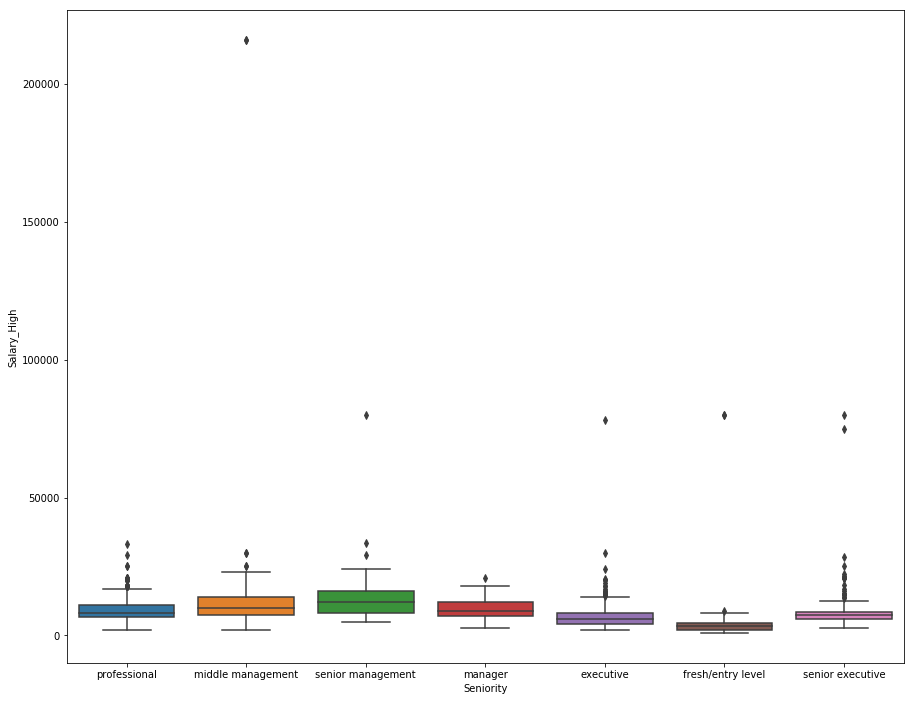

In [9]:
### Observe breakdown
print (df_senior_view['Seniority'].value_counts())

### Plot to observe relationship between seniorities
plt.figure(figsize=(15,12))
sns.boxplot(x='Seniority', y='Salary_High', data=df_senior_view)

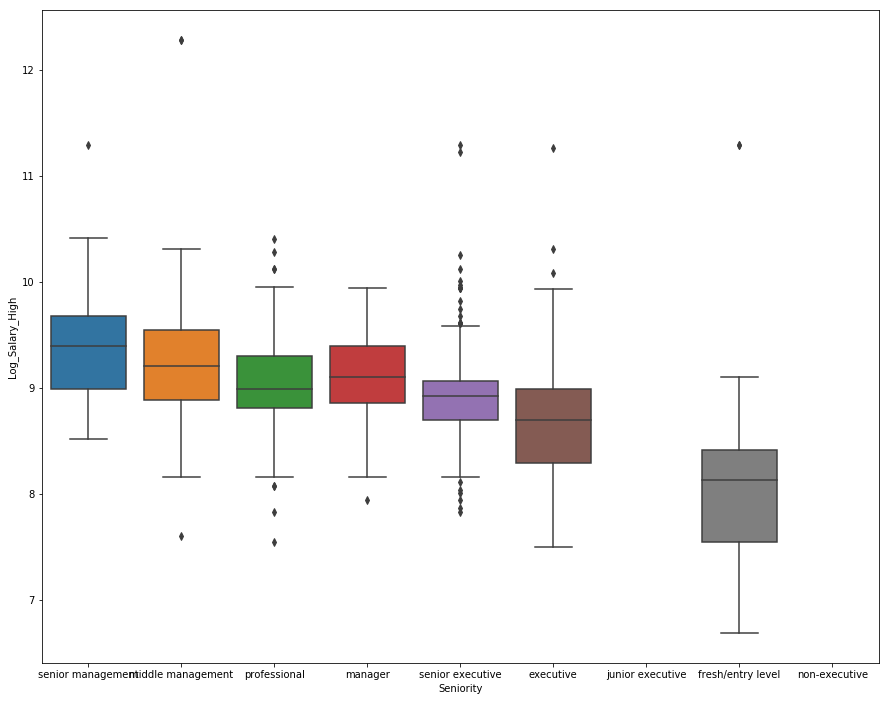

In [10]:
### Plot seems too flattened due to outliers... Logging salary for better plotting view
df_senior_view['Log_Salary_High'] = np.log(df_senior_view['Salary_High'])

### Plot again to view change
plt.figure(figsize=(15,12))
sns.boxplot(x='Seniority', y='Log_Salary_High', data=df_senior_view, order=['senior management','middle management', 'professional', 'manager', 'senior executive', 'executive', 'junior executive', 'fresh/entry level', 'non-executive'])

In [11]:
### Try a more conservative approach, awarding lower seniority first
df_senior_view_opp = df2.copy(deep=True)
s_list = []
for seniority in df_senior_view_opp['Seniority']:  
    
    if 'non-executive' in seniority: 
        s_list += ['non-executive']    
    elif 'fresh/entry level' in seniority: 
        s_list += ['fresh/entry level']    
    elif 'junior executive' in seniority: 
        s_list += ['junior executive']       
    elif 'executive' in seniority: 
        s_list += ['executive']    
    elif 'senior executive' in seniority: 
        s_list += ['senior executive'] 
    elif 'manager' in seniority: 
        s_list += ['manager']        
    elif 'professional' in seniority: 
        s_list += ['professional']        
    elif 'middle management' in seniority: 
        s_list += ['middle management']        
    elif 'seinor management' in seniority: 
        s_list += ['senior management']
    else:
        s_list += [seniority]
        
        
df_senior_view_opp['Seniority'] = s_list

Seems like the descending approached is better. Will revert to the <df_senior_view> version...


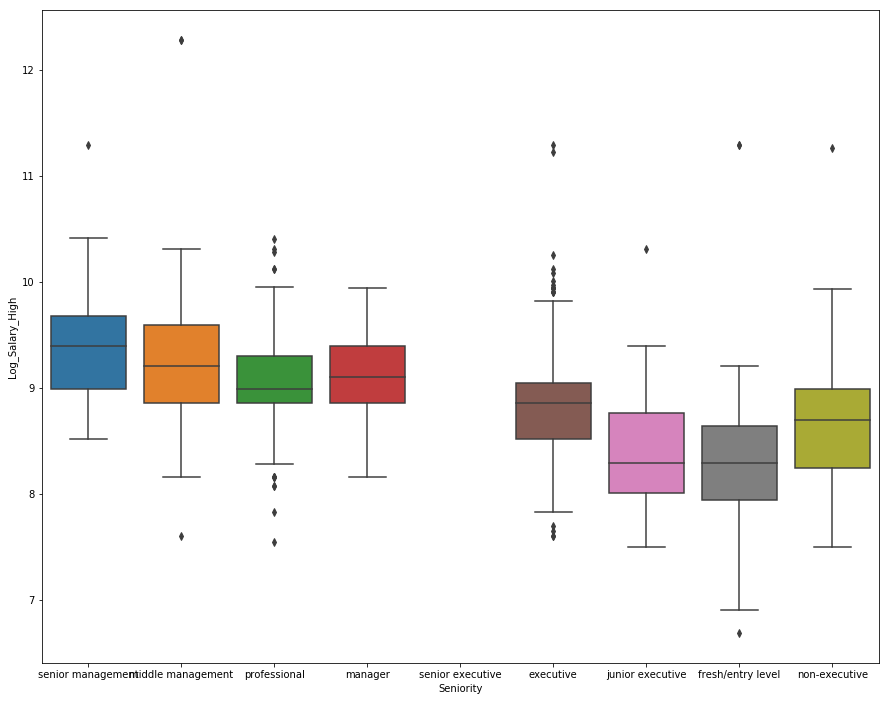

In [12]:
df_senior_view_opp['Log_Salary_High'] = np.log(df_senior_view_opp['Salary_High'])

### Plot again to view change
plt.figure(figsize=(15,12))
sns.boxplot(x='Seniority', y='Log_Salary_High', data=df_senior_view_opp, order=['senior management','middle management', 'professional', 'manager', 'senior executive', 'executive', 'junior executive', 'fresh/entry level', 'non-executive'])
print ('Seems like the descending approached is better. Will revert to the <df_senior_view> version...')

In [48]:
df_senior_view

,Url,Job_Title,Company_Name,Industry,Commitment,Seniority,Salary_Period,Posting_Date,Closing_Date,Roles_And_Responsibilities,Requirements,About_The_Company,Govt_Support,Salary_Low,Salary_High,Hiring_Period,Log_Salary_High
0,https://www.mycareersfuture.sg/job/data-scient...,data scientist,singapore power limited,information technology,full time,professional,monthly,2019-01-28,2019-02-27,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,4000.0,8000.000000,30,8.987197
1,https://www.mycareersfuture.sg/job/senior-data...,senior data scientist,singapore power limited,information technology,full time,middle management,monthly,2019-01-28,2019-02-27,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,8000.0,14000.000000,30,9.546813
2,https://www.mycareersfuture.sg/job/data-direct...,data director,tbwa singapore pte ltd,advertising / media,"permanent, full time",professional,monthly,2019-01-28,2019-02-27,roles & responsibilities what does a data dir...,requirements skills and experience required: ...,about the company tbwa worldwide (www.tbwa.co...,1,8000.0,15000.000000,30,9.615805
3,https://www.mycareersfuture.sg/job/head-data-e...,head of data engineering,fixed & mobile pte. ltd.,information technology,"permanent, full time",senior management,monthly,2019-01-28,2019-02-27,roles & responsibilities transferto operates ...,requirements essential experience more than ...,about the company fixed & mobile pte. ltd. t...,1,8000.0,11000.000000,30,9.305651
5,https://www.mycareersfuture.sg/job/data-scient...,data scientist - information technology,nomura singapore limited,banking and finance,full time,professional,monthly,2019-01-28,2019-02-27,roles & responsibilities nomura overview n...,requirements key experience & skills stron...,about the company nomura is a leading financi...,0,20800.0,33000.000000,30,10.404263
6,https://www.mycareersfuture.sg/job/manager-fut...,manager - future of work (data science),deloitte consulting pte. ltd.,consulting,permanent,manager,monthly,2019-01-28,2019-02-27,roles & responsibilities what impact will you...,requirements ms or higher in computer science...,about the company deloitte consulting pte. lt...,1,7000.0,14000.000000,30,9.546813
7,https://www.mycareersfuture.sg/job/data-scient...,data scientist,spotify singapore pte. ltd.,others,permanent,executive,annually,2019-01-28,2019-02-27,roles & responsibilities we seek an outstandi...,requirements who you are degree in computer ...,"about the company at spotify, we’re passionat...",0,7500.0,9166.666667,30,9.123329
8,https://www.mycareersfuture.sg/job/senior-engi...,"senior engineer / engineer, data centre facili...",starhub ltd.,engineering,"permanent, full time",fresh/entry level,monthly,2019-01-28,2019-02-27,"roles & responsibilities oversee security, ac...",requirements qualifications bachelor degree ...,about the company starhub is singapore's full...,0,3500.0,4800.000000,30,8.476371
9,https://www.mycareersfuture.sg/job/lead-consul...,lead consultant,ncs pte. ltd.,information technology,permanent,professional,monthly,2019-01-28,2019-02-27,roles & responsibilities development of data ...,requirements bachelors or master’s degree in ...,about the company ncs is a leading infocommun...,1,7000.0,10000.000000,30,9.210340
10,https://www.mycareersfuture.sg/job/strategic-i...,"strategic insights specialist, apac",tripadvisor singapore private limited,"others, travel / tourism","permanent, full time",executive,monthly,2019-01-28,2019-02-27,roles & responsibilities why this role is exc...,requirements the ideal candidate is: passion...,about the company tripadvisor® is the world's...,0,4500.0,6600.000000,30,8.794825


# Question 1

In [14]:
### Prepping the data for modelling 
df3 = df_senior_view.copy(deep=True)

### Drop unwanted columns
df3.drop(columns=['Url', 'Posting_Date', 'Company_Name', 'Salary_Period', 'Closing_Date', 'Log_Salary_High'], inplace=True)

### Create new 'Salary_Avg' column
df3['Salary_Avg'] = (df3['Salary_High'] + df3['Salary_Low']) / 2

### Drop Salary High and Low columns since there is already an Avg / Average column
df3.drop(columns=['Salary_High', 'Salary_Low'], inplace=True)


### Find the 55th percentile for each seniority category
High_Low_Split = df3.groupby('Seniority').quantile(0.55)['Salary_Avg']
High_Low_Dict = {High_Low_Split.index[i] : value for i, value in enumerate(High_Low_Split)}                                        
                                                        
### Map each entry to high or low salary
df3['High_Low'] = [1 if salary >= High_Low_Dict[df3.iloc[i , 3]] else 0 for i, salary in enumerate(df3['Salary_Avg'])]
# print (High_Low_Dict)
df3

,Job_Title,Industry,Commitment,Seniority,Roles_And_Responsibilities,Requirements,About_The_Company,Govt_Support,Hiring_Period,Salary_Avg,High_Low
0,data scientist,information technology,full time,professional,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,6000.000000,0
1,senior data scientist,information technology,full time,middle management,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,11000.000000,1
2,data director,advertising / media,"permanent, full time",professional,roles & responsibilities what does a data dir...,requirements skills and experience required: ...,about the company tbwa worldwide (www.tbwa.co...,1,30,11500.000000,1
3,head of data engineering,information technology,"permanent, full time",senior management,roles & responsibilities transferto operates ...,requirements essential experience more than ...,about the company fixed & mobile pte. ltd. t...,1,30,9500.000000,0
5,data scientist - information technology,banking and finance,full time,professional,roles & responsibilities nomura overview n...,requirements key experience & skills stron...,about the company nomura is a leading financi...,0,30,26900.000000,1
6,manager - future of work (data science),consulting,permanent,manager,roles & responsibilities what impact will you...,requirements ms or higher in computer science...,about the company deloitte consulting pte. lt...,1,30,10500.000000,1
7,data scientist,others,permanent,executive,roles & responsibilities we seek an outstandi...,requirements who you are degree in computer ...,"about the company at spotify, we’re passionat...",0,30,8333.333333,1
8,"senior engineer / engineer, data centre facili...",engineering,"permanent, full time",fresh/entry level,"roles & responsibilities oversee security, ac...",requirements qualifications bachelor degree ...,about the company starhub is singapore's full...,0,30,4150.000000,1
9,lead consultant,information technology,permanent,professional,roles & responsibilities development of data ...,requirements bachelors or master’s degree in ...,about the company ncs is a leading infocommun...,1,30,8500.000000,1
10,"strategic insights specialist, apac","others, travel / tourism","permanent, full time",executive,roles & responsibilities why this role is exc...,requirements the ideal candidate is: passion...,about the company tripadvisor® is the world's...,0,30,5550.000000,1


In [15]:
df5 = df3.copy(deep=True)
### Identify caegorical columns
categorical_cols = ['Commitment', 'Seniority']
### Turn categorical for categorical columns
df5 = pd.get_dummies(columns=categorical_cols, data=df5)

### Last minute cleaning!!!
### Remove some year month specefic words
df5['Job_Title'] = [title.replace('2019', '').replace('2018', '') for title in df5['Job_Title']]


### Split into X and y
X = df5.drop(columns=['Salary_Avg', 'High_Low']).copy(deep=True)
y = df5['High_Low']

### Train Test split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
test = X_train.copy(deep=True)

### Vectorize NLP columns
### Initiate CountVectorizer

### Job_Title
Vectorizer_Job_Title = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
X_train_Job_Title = pd.DataFrame(Vectorizer_Job_Title.fit_transform(X_train['Job_Title']).todense(), index=X_train.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])
X_test_Job_Title = pd.DataFrame(Vectorizer_Job_Title.transform(X_test['Job_Title']).todense(), index=X_test.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])


### Industry
Vectorizer_Industry = CountVectorizer(max_df=.9, ngram_range=(1,1), stop_words='english')
X_train_Industry = pd.DataFrame(Vectorizer_Industry.fit_transform(X_train['Industry']).todense(), index=X_train.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
X_test_Industry = pd.DataFrame(Vectorizer_Industry.transform(X_test['Industry']).todense(), index=X_test.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
print (X_train_Industry.shape, X_test_Industry.shape)

### Roles_And_Responsibilities
Vectorizer_RR = CountVectorizer(max_df=.98, min_df=0.001,  ngram_range=(1,2), stop_words='english')
X_train_RR = pd.DataFrame(Vectorizer_RR.fit_transform(X_train['Roles_And_Responsibilities']).todense(), index=X_train.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
X_test_RR = pd.DataFrame(Vectorizer_RR.transform(X_test['Roles_And_Responsibilities']).todense(), index=X_test.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
print (X_train_RR.shape, X_test_RR.shape)

### Requirements
Vectorizer_Requirements = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
X_train_Requirements = pd.DataFrame(Vectorizer_Requirements.fit_transform(X_train['Requirements']).todense(), index=X_train.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
X_test_Requirements = pd.DataFrame(Vectorizer_Requirements.transform(X_test['Requirements']).todense(), index=X_test.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
print (X_train_Requirements.shape, X_test_Requirements.shape)

### Turning the About_The_Company off since there are missing values in some entries
# ### About_The_Company
# Vectorizer_About_The_Company = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
# X_train_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.fit_transform(X_train['About_The_Company']).todense(), index=X_train.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# X_test_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.transform(X_test['About_The_Company']).todense(), index=X_test.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# print (X_train_About_The_Company.shape, X_test_About_The_Company.shape)

### Putting it all back together
### Function to combined vectorized columns
def put_back(df, *vectorized_cols):
    count = 0
    for vectorized in vectorized_cols:
        df = df.merge(vectorized, left_index=True, right_index=True)
    
    return df

### Consolidate X_train
### Drop columns that are vectorized
X_train.drop(columns=['Job_Title', 'Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_train = put_back(X_train, X_train_Job_Title, X_train_Industry, X_train_Requirements, X_train_RR)

### Print shape
print (X_train.shape)


### Consolidate X_test
### Drop columns that are vectorized
X_test.drop(columns=['Job_Title', 'Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_test = put_back(X_test, X_test_Job_Title, X_test_Industry, X_test_Requirements, X_test_RR)

### Print shape
print (X_test.shape)



### Print baseline
print ('Baseline: {}'.format(1 - df5['High_Low'].mean()))

(2047, 70) (228, 70)
(2047, 26389) (228, 26389)
(2047, 1823) (228, 1823)


C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2047, 28384)
(228, 28384)
Baseline: 0.5243956043956044


In [16]:
### Initiate Basic RandomForestClassifier to get a general feel of the stength of the signals
rdf = RandomForestClassifier(random_state=0)

### Fit the model
rdf.fit(X_train, y_train)

### Find the cross_val_score
score_rdf = cross_val_score(rdf, X_train, y_train, n_jobs=10, cv=5)

print (score_rdf.mean())
score_rdf

C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7044252466327338


array([0.66829268, 0.72439024, 0.73170732, 0.72371638, 0.67401961])

Text(0.5, 1.0, 'Feature importances from RandomForestClassifier')

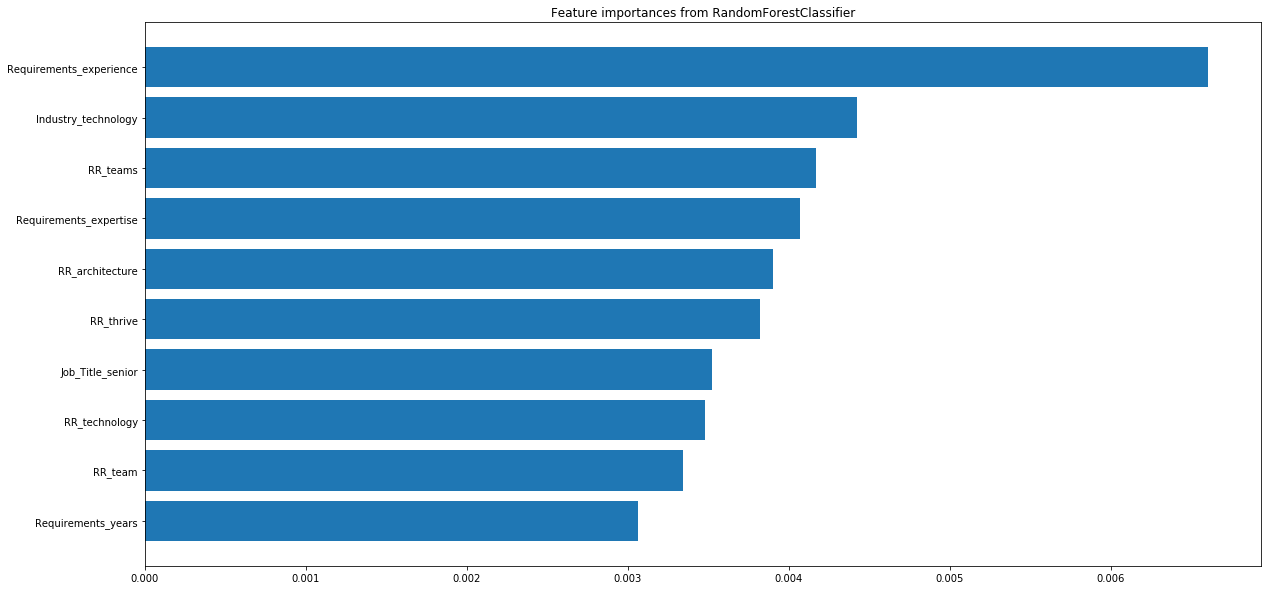

In [17]:
### Plot feature importance
rdf_plot = pd.DataFrame(rdf.feature_importances_, index=X_train.columns, columns=['Value']).sort_values(['Value'], ascending=True)
plt.figure(figsize=(20, 10))
plt.barh(y=rdf_plot.index.values[-10:], width=rdf_plot['Value'].values[-10:] )
plt.title('Feature importances from RandomForestClassifier')




# print ('Seems like the following 3 have high importance with regards to High or Low salary:')
# print ("'teams' related Roles & Responsibilities")
# print ("'experience' in Requirements")
# print ("'senior' position likely garner more pay")

In [18]:
### Evaluate model using confusion matrix, classification report and AUC

### Setup confusion matrix
cm = confusion_matrix(y_test, rdf.predict(X_test), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_High','True_Low'], columns = ['Pred_High','Pred_Low'])

### Print classification report
print (classification_report(y_test, rdf.predict(X_test)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(rdf.predict_proba(X_test), columns=rdf.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nIt seems that just running the model with basic values, the model relatively better than the baseline. But there are still rooms for improvement. Shall attempt some parameter tuning next...')

cm

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       130
           1       0.71      0.69      0.70        98

   micro avg       0.75      0.75      0.75       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.75      0.75      0.75       228

AUC: 0.793563579277865

It seems that just running the model with basic values, the model relatively better than the baseline. But there are still rooms for improvement. Shall attempt some parameter tuning next...


,Pred_High,Pred_Low
True_High,68,30
True_Low,28,102


In [19]:
### Try parameter tuning to improve RandomForestClassifier.
### Playing around with parameters
rdf1 = RandomForestClassifier(n_estimators=300, n_jobs=10, min_samples_leaf=1, max_features=250, random_state=0)

### Fit the model
rdf1.fit(X_train, y_train)

### Find the cross_val_score
score_rdf1 = cross_val_score(rdf1, X_train, y_train, n_jobs=10, cv=5)

print (score_rdf1.mean())
score_rdf1

0.7459699153082427


array([0.72682927, 0.74390244, 0.75853659, 0.76283619, 0.7377451 ])

In [20]:
# rdf_gs = RandomForestClassifier(random_state=0)

# params = {
#     'n_estimators' : range(300, 501, 100),
#     'min_samples_leaf' : range(2,7),
#     'max_features' : range(250, 1001, 250),
#     'class_weight' : ['balanced', 'balanced_subsample', None]
# #     'min_samples_split' : range(2, 12, 2)
# }

# GS = GridSearchCV(rdf_gs, params, scoring='roc_auc', cv=5, n_jobs=10, verbose=2)
# GS.fit(X_train, y_train)

In [21]:
### These were the Grid Search Results... DONT RUN THE GRID SEARCH TAs
print ('These were the Grid Search Results... DONT RUN THE GRID SEARCH TAs!!!\n')
print ('''Best score: 0.8210336463749791''')
print ('''Best parameters from Grid Search:\n 
{'class_weight': 'balanced',
 'max_features': 500,
 'min_samples_leaf': 2,
 'n_estimators': 300}''')

These were the Grid Search Results... DONT RUN THE GRID SEARCH TAs!!!

Best score: 0.8210336463749791
Best parameters from Grid Search:
 
{'class_weight': 'balanced',
 'max_features': 500,
 'min_samples_leaf': 2,
 'n_estimators': 300}


In [22]:
### Test out the parameters given by Grid Search 
rdf2 = RandomForestClassifier(n_estimators=300, n_jobs=10, min_samples_leaf=2, class_weight='balanced', max_features=500, random_state=0)

rdf2.fit(X_train, y_train)

### Evaluate model using confusion matrix, classification report and AUC

### Setup confusion matrix
cm = confusion_matrix(y_test, rdf2.predict(X_test), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_High','True_Low'], columns = ['Pred_High','Pred_Low'])

### Print classification report
print (classification_report(y_test, rdf2.predict(X_test)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(rdf2.predict_proba(X_test), columns=rdf2.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nThe AUC is a lot more superior after Grid Searching. We can try other models... But it seems pretty good for now.')

cm

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       130
           1       0.66      0.77      0.71        98

   micro avg       0.73      0.73      0.73       228
   macro avg       0.73      0.74      0.73       228
weighted avg       0.74      0.73      0.73       228

AUC: 0.8279434850863423

The AUC is a lot more superior after Grid Searching. We can try other models... But it seems pretty good for now.


,Pred_High,Pred_Low
True_High,75,23
True_Low,38,92


In [23]:
### Lol jk let's / we shall try running the problem through a neural network
import keras
from keras.models import Sequential
from keras.layers import Dense

# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)


### Setting up the neural network
### Using nodes in multiples of 8 as there are 8 distinct categories of information in the dataset
classifier = Sequential()
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, nb_epoch = 100, batch_size= 16)

Using TensorFlow backend.
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=28384, units=16, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  app.launch_new_instance()
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
2047/2047 [==============================] - 2s 1ms/step - loss: 0.6338 - acc: 0.6654
Epoch 2/100
2047/2047 [==============================] - 2s 907us/step - loss: 0.3924 - acc: 0.8329
Epoch 3/100
2047/2047 [==============================] - 2s 925us/step - loss: 0.2153 - acc: 0.9272
Epoch 4/100
2047/2047 [==============================] - 2s 941us/step - loss: 0.1428 - acc: 0.9546
Epoch 5/100
2047/2047 [==============================] - 2s 947us/step - loss: 0.1157 - acc: 0.9629
Epoch 6/100
2047/2047 [==============================] - 2s 922us/step - loss: 0.0927 - acc: 0.9707
Epoch 7/100
2047/2047 [==============================] - 2s 915us/step - loss: 0.0880 - acc: 0.9668
Epoch 8/100
2047/2047 [==============================] - 2s 945us/step - loss: 0.0807 - acc: 0.9648
Epoch 9/100
2047/2047 [==============================] - 2s 927us/step - loss: 0.0762 - acc: 0.9663
Epoch 10/100
2047/2047 [==============================] - 2s 898us/step - loss: 0.0685 - acc: 0.9717
E

2047/2047 [==============================] - 2s 900us/step - loss: 0.0245 - acc: 0.9878
Epoch 83/100
2047/2047 [==============================] - 2s 922us/step - loss: 0.0284 - acc: 0.9834 1s - loss: 0.0254 - acc:  - ETA: 1s - loss
Epoch 84/100
2047/2047 [==============================] - 2s 909us/step - loss: 0.0237 - acc: 0.9853
Epoch 85/100
2047/2047 [==============================] - 2s 909us/step - loss: 0.0229 - acc: 0.9868
Epoch 86/100
2047/2047 [==============================] - 2s 905us/step - loss: 0.0228 - acc: 0.9868
Epoch 87/100
2047/2047 [==============================] - 2s 928us/step - loss: 0.0226 - acc: 0.9868
Epoch 88/100
2047/2047 [==============================] - 2s 908us/step - loss: 0.0261 - acc: 0.9829
Epoch 89/100
2047/2047 [==============================] - 2s 922us/step - loss: 0.0281 - acc: 0.9844
Epoch 90/100
2047/2047 [==============================] - 2s 906us/step - loss: 0.0237 - acc: 0.9863
Epoch 91/100
2047/2047 [==============================] - 2s 

In [24]:
cm = confusion_matrix(y_test, classifier.predict_classes(X_test), labels= [1,0])
print (classification_report(y_test, classifier.predict_classes(X_test)))
cm = pd.DataFrame(cm, index=['True_High','True_Low'], columns = ['Pred_High','Pred_Low'])

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(classifier.predict_proba(X_test)).iloc[:,0])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

cm


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       130
           1       0.67      0.72      0.70        98

   micro avg       0.73      0.73      0.73       228
   macro avg       0.72      0.73      0.73       228
weighted avg       0.73      0.73      0.73       228

AUC: 0.8196624803767661


,Pred_High,Pred_Low
True_High,71,27
True_Low,35,95


In [25]:
print ('Though ANN perform SLIGHTLY AND ONLY SLIGHTLY worse, it took a MUCH shorter time to reach a similar efficacy. As such, if feature importance is not that important, use ANN.')

Though ANN perform SLIGHTLY AND ONLY SLIGHTLY worse, it took a MUCH shorter time to reach a similar efficacy. As such, if feature importance is not that important, use ANN.


# Bonus 

In [26]:
print ('The idea is to reduce the risk of misclassifying a low salary job as high salary. As such what we need to do is to amp up the precision for Predicted high salary... Increasing the threshold for predicting High_Salary')
print ('\nBut what is the tradeoff?')

The idea is to reduce the risk of misclassifying a low salary job as high salary. As such what we need to do is to amp up the precision for Predicted high salary... Increasing the threshold for predicting High_Salary

But what is the tradeoff?


AUC: 0.8279434850863423
As seen from this curve, If we want to reduce the chance of reporting High Salary when it is indeed Low Salary we have to minimize the False Positive Rates.
However, as seen from this curve, if we try to minimize False Postive rates to 0 we will inevitably decrease True Positive Rate to a very small amount as well
Let"s try it out...


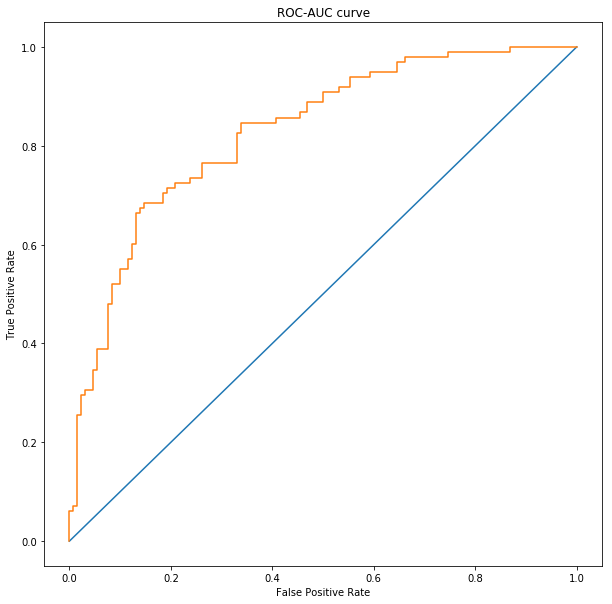

In [27]:
### Plotting the AUC curve for y_test
df_Pred_y_test = pd.DataFrame(rdf2.predict_proba(X_test), columns=rdf2.classes_)

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, df_Pred_y_test[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

### Plot AUC curve
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')

print ('As seen from this curve, If we want to reduce the chance of reporting High Salary when it is indeed Low Salary we have to minimize the False Positive Rates.')
print ('However, as seen from this curve, if we try to minimize False Postive rates to 0 we will inevitably decrease True Positive Rate to a very small amount as well')
print ('Let"s try it out...')

In [28]:
### Create dataframe of the predicted probabilities of y_pred using X_train
### For this part, we will be using the train set as in reality we won't be able to optimize a certain aspect of the model to match an unknown true set.
df_Pred_y_train = pd.DataFrame(rdf2.predict_proba(X_train), columns=rdf2.classes_)

### Create a function to find threshold where precision is 1.00 
def find_opt_threshold(y_true, df_proba, precision_target):
    threshold = 0.5
    while True:
        threshold += 0.01
        df_proba['Pred_y'] = [1 if prob > threshold else 0 for prob in df_proba.iloc[:,0]]
        precision = precision_score(y_true, df_proba['Pred_y'])
        if precision >= precision_target:
            return threshold

### Get the threshold while maximizing the precision of getting high salary
threshold = find_opt_threshold(y_train, pd.DataFrame(df_Pred_y_train[1]), 1)


### Applying the threshold to y_pred from y_test
### Increasing threshold to threshold number
df_Pred_y_test['Pred_y'] = [1 if prob > threshold else 0 for prob in df_Pred_y_test[1]]

### View confusion matrix, AUC, and classification report to evaluate result
### Setup confusion matrix
cm = confusion_matrix(y_test, df_Pred_y_test['Pred_y'], labels= [1,0])
cm = pd.DataFrame(cm, index=['True_High','True_Low'], columns = ['Pred_High','Pred_Low'])

### Print classification report
print (classification_report(y_test, df_Pred_y_test['Pred_y']))

print ('\nAs shown, using the train set to find a threshold number by maximizing precision to 1 and applying it back to the test set, we are able to get a really high precision for True Positives for the test set')
print ('\nHowever, as a result, we sacrifice getting a high recall on predicting High Salary')
print ('\nThat said, since it seems that getting High Salary wrong is a lot more costly/disadvantages than getting Low Salary wrong. This is actually a favorable situation for us. Shall leave the threshold as it is.')

cm

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       130
           1       0.88      0.15      0.26        98

   micro avg       0.63      0.63      0.63       228
   macro avg       0.74      0.57      0.51       228
weighted avg       0.73      0.63      0.54       228


As shown, using the train set to find a threshold number by maximizing precision to 1 and applying it back to the test set, we are able to get a really high precision for True Positives for the test set

However, as a result, we sacrifice getting a high recall on predicting High Salary

That said, since it seems that getting High Salary wrong is a lot more costly/disadvantages than getting Low Salary wrong. This is actually a favorable situation for us. Shall leave the threshold as it is.


,Pred_High,Pred_Low
True_High,15,83
True_Low,2,128


# Question 2

In [29]:
df6 = df3.copy(deep=True)

### View the number of Job_Titles with 'data scientist' name
print (len([title for title in df6['Job_Title'] if 'data scientist' in title]))
print ('There are only 65 instances of Data Scientist Job Titles. This will cause a servere class imbalance when trying to predict. HOWEVER, we can still try...')
df6

65
There are only 65 instances of Data Scientist Job Titles. This will cause a servere class imbalance when trying to predict. HOWEVER, we can still try...


,Job_Title,Industry,Commitment,Seniority,Roles_And_Responsibilities,Requirements,About_The_Company,Govt_Support,Hiring_Period,Salary_Avg,High_Low
0,data scientist,information technology,full time,professional,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,6000.000000,0
1,senior data scientist,information technology,full time,middle management,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,11000.000000,1
2,data director,advertising / media,"permanent, full time",professional,roles & responsibilities what does a data dir...,requirements skills and experience required: ...,about the company tbwa worldwide (www.tbwa.co...,1,30,11500.000000,1
3,head of data engineering,information technology,"permanent, full time",senior management,roles & responsibilities transferto operates ...,requirements essential experience more than ...,about the company fixed & mobile pte. ltd. t...,1,30,9500.000000,0
5,data scientist - information technology,banking and finance,full time,professional,roles & responsibilities nomura overview n...,requirements key experience & skills stron...,about the company nomura is a leading financi...,0,30,26900.000000,1
6,manager - future of work (data science),consulting,permanent,manager,roles & responsibilities what impact will you...,requirements ms or higher in computer science...,about the company deloitte consulting pte. lt...,1,30,10500.000000,1
7,data scientist,others,permanent,executive,roles & responsibilities we seek an outstandi...,requirements who you are degree in computer ...,"about the company at spotify, we’re passionat...",0,30,8333.333333,1
8,"senior engineer / engineer, data centre facili...",engineering,"permanent, full time",fresh/entry level,"roles & responsibilities oversee security, ac...",requirements qualifications bachelor degree ...,about the company starhub is singapore's full...,0,30,4150.000000,1
9,lead consultant,information technology,permanent,professional,roles & responsibilities development of data ...,requirements bachelors or master’s degree in ...,about the company ncs is a leading infocommun...,1,30,8500.000000,1
10,"strategic insights specialist, apac","others, travel / tourism","permanent, full time",executive,roles & responsibilities why this role is exc...,requirements the ideal candidate is: passion...,about the company tripadvisor® is the world's...,0,30,5550.000000,1


In [30]:
df6 = df3.copy(deep=True)
### Identify caegorical columns
categorical_cols = ['Commitment', 'Seniority']
### Turn categorical for categorical columns
df6 = pd.get_dummies(columns=categorical_cols, data=df6)

### Last minute cleaning!!!
### Remove some year month specefic words
df6['Job_Title'] = [title.replace('2019', '').replace('2018', '') for title in df6['Job_Title']]

### Identify 'data scientist's Job_Titles
df6['Is_Data_Scientist'] = [1 if 'data scientist' in title else 0 for title in df6['Job_Title']]

### Split into X and y
X = df6.drop(columns=['Job_Title', 'High_Low', 'Is_Data_Scientist']).copy(deep=True)
y = df6['Is_Data_Scientist']

### Train Test split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
test = X_train.copy(deep=True)

### Vectorize NLP columns
### Initiate CountVectorizer

### Off / Turning this off since this is now the target
# ### Job_Title
# Vectorizer_Job_Title = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
# X_train_Job_Title = pd.DataFrame(Vectorizer_Job_Title.fit_transform(X_train['Job_Title']).todense(), index=X_train.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])
# X_test_Job_Title = pd.DataFrame(Vectorizer_Job_Title.transform(X_test['Job_Title']).todense(), index=X_test.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])


### Industry
Vectorizer_Industry = CountVectorizer(max_df=.9, ngram_range=(1,1), stop_words='english')
X_train_Industry = pd.DataFrame(Vectorizer_Industry.fit_transform(X_train['Industry']).todense(), index=X_train.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
X_test_Industry = pd.DataFrame(Vectorizer_Industry.transform(X_test['Industry']).todense(), index=X_test.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
print (X_train_Industry.shape, X_test_Industry.shape)

### Roles_And_Responsibilities
Vectorizer_RR = CountVectorizer(max_df=.98, min_df=0.001,  ngram_range=(1,2), stop_words='english')
X_train_RR = pd.DataFrame(Vectorizer_RR.fit_transform(X_train['Roles_And_Responsibilities']).todense(), index=X_train.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
X_test_RR = pd.DataFrame(Vectorizer_RR.transform(X_test['Roles_And_Responsibilities']).todense(), index=X_test.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
print (X_train_RR.shape, X_test_RR.shape)

### Requirements
Vectorizer_Requirements = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
X_train_Requirements = pd.DataFrame(Vectorizer_Requirements.fit_transform(X_train['Requirements']).todense(), index=X_train.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
X_test_Requirements = pd.DataFrame(Vectorizer_Requirements.transform(X_test['Requirements']).todense(), index=X_test.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
print (X_train_Requirements.shape, X_test_Requirements.shape)

### Turning the About_The_Company off since there are missing values in some entries
# ### About_The_Company
# Vectorizer_About_The_Company = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
# X_train_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.fit_transform(X_train['About_The_Company']).todense(), index=X_train.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# X_test_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.transform(X_test['About_The_Company']).todense(), index=X_test.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# print (X_train_About_The_Company.shape, X_test_About_The_Company.shape)

### Putting it all back together
### Function to combined vectorized columns
def put_back(df, *vectorized_cols):
    count = 0
    for vectorized in vectorized_cols:
        df = df.merge(vectorized, left_index=True, right_index=True)
    
    return df

### Consolidate X_train
### Drop columns that are vectorized
X_train.drop(columns=['Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_train = put_back(X_train, X_train_Industry, X_train_Requirements, X_train_RR)

### Print shape
print (X_train.shape)


### Consolidate X_test
### Drop columns that are vectorized
X_test.drop(columns=['Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_test = put_back(X_test, X_test_Industry, X_test_Requirements, X_test_RR)

### Print shape
print (X_test.shape)



### Print baseline
print ('Baseline: {}'.format(1 - df6['Is_Data_Scientist'].mean()))

(2047, 69) (228, 69)
(2047, 26815) (228, 26815)
(2047, 1816) (228, 1816)


C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2047, 28734)
(228, 28734)
Baseline: 0.9714285714285714


In [31]:
### Initiate Basic RandomForestClassifier to get a general feel of the stength of the signals
rdf3 = RandomForestClassifier(random_state=0, class_weight='balanced')

### Fit the model
rdf3.fit(X_train, y_train)

### Find the cross_val_score
score_rdf3 = cross_val_score(rdf3, X_train, y_train, n_jobs=10, cv=5)

print (score_rdf3.mean())
score_rdf3

C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9741093046359586


array([0.97323601, 0.97799511, 0.97310513, 0.97310513, 0.97310513])

In [32]:
### Evaluate model using confusion matrix, classification report and AUC

### Setup confusion matrix
cm = confusion_matrix(y_test, rdf3.predict(X_test), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_Data' ,'True_No_Data'], columns = ['Pred_Data','Pred_No_Data'])

### Print classification report
print (classification_report(y_test, rdf3.predict(X_test)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(rdf3.predict_proba(X_test), columns=rdf3.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nAs expected... It works not great but not too bad either... However, this is an evaluation based on the test data, let"s observe how it fair on the training dataset')

cm

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       219
           1       1.00      0.33      0.50         9

   micro avg       0.97      0.97      0.97       228
   macro avg       0.99      0.67      0.74       228
weighted avg       0.97      0.97      0.97       228

AUC: 0.9817351598173516

As expected... It works not great but not too bad either... However, this is an evaluation based on the test data, let"s observe how it fair on the training dataset


,Pred_Data,Pred_No_Data
True_Data,3,6
True_No_Data,0,219


In [33]:
### Evaluate model using confusion matrix, classification report and AUC
### ON TRAIN DATA!!!

### Setup confusion matrix
cm = confusion_matrix(y_train, rdf3.predict(X_train), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_Data' ,'True_No_Data'], columns = ['Pred_Data','Pred_No_Data'])

### Print classification report
print (classification_report(y_train, rdf3.predict(X_train)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_train, pd.DataFrame(rdf3.predict_proba(X_train), columns=rdf3.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nThe model actually did pretty well for the train data! With a close to perfect precision score on both counts and an almost perfect recall too!')
print ('\nThis could mean 2 things (or both):\n(1) The model is overfitting\n(2) The model doesn"t have sufficient information to predict the test set (i.e. have not experienced enough possibilities)')
print ('\nGiven that this is a case of a serious class imbalance, it is highly likely to be the latter. In that case, we can still extract relevant feature importance information from it. Since, the AUC of close to perfect suggests that the model have sufficient information to decern between the 2 classes within it"s own training dataset/set')
print ('\nLet"s inspect the features...')
cm

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      0.95      0.97        56

   micro avg       1.00      1.00      1.00      2047
   macro avg       1.00      0.97      0.99      2047
weighted avg       1.00      1.00      1.00      2047

AUC: 1.0

The model actually did pretty well for the train data! With a close to perfect precision score on both counts and an almost perfect recall too!

This could mean 2 things (or both):
(1) The model is overfitting
(2) The model doesn"t have sufficient information to predict the test set (i.e. have not experienced enough possibilities)

Given that this is a case of a serious class imbalance, it is highly likely to be the latter. In that case, we can still extract relevant feature importance information from it. Since, the AUC of close to perfect suggests that the model have sufficient information to decern between the 2 classes within it"s own training dataset

,Pred_Data,Pred_No_Data
True_Data,53,3
True_No_Data,0,1991


Text(0.5, 1.0, 'Feature importances from RandomForestClassifier')

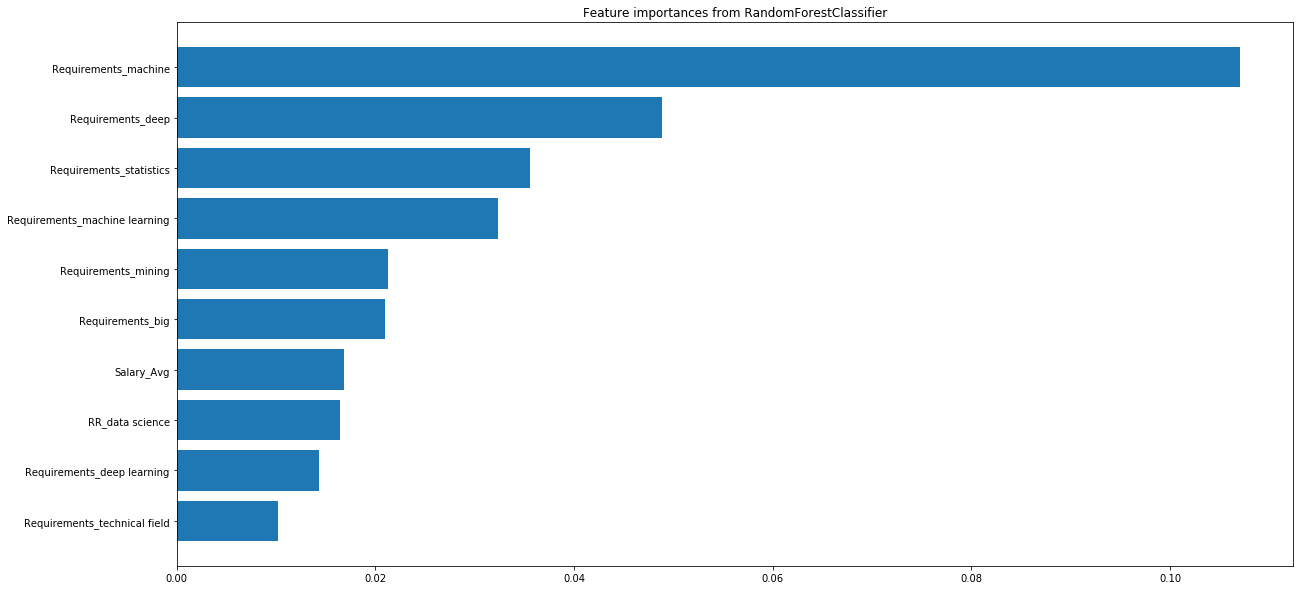

In [34]:
### Plot feature importance
rdf3_plot = pd.DataFrame(rdf3.feature_importances_, index=X_train.columns, columns=['Value']).sort_values(['Value'], ascending=True)
plt.figure(figsize=(20, 10))
plt.barh(y=rdf3_plot.index.values[-10:], width=rdf3_plot['Value'].values[-10:] )
plt.title('Feature importances from RandomForestClassifier')

In [35]:
print ('As shown above, most of the top10 features came from the <Requirements> section of a job description. \nFurthermore, all of the keywords are related to the "Data Science" field, (such as, "data mining", "deep learning", "tensorflow", etc.) which makes sense since those are really textbook example of a Data Scientist"s skillsets')

As shown above, most of the top10 features came from the <Requirements> section of a job description. 
Furthermore, all of the keywords are related to the "Data Science" field, (such as, "data mining", "deep learning", "tensorflow", etc.) which makes sense since those are really textbook example of a Data Scientist"s skillsets


# 2.1 Management vs Non-Management Positions

In [36]:
df3

,Job_Title,Industry,Commitment,Seniority,Roles_And_Responsibilities,Requirements,About_The_Company,Govt_Support,Hiring_Period,Salary_Avg,High_Low
0,data scientist,information technology,full time,professional,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,6000.000000,0
1,senior data scientist,information technology,full time,middle management,roles & responsibilities why work for us we ...,requirements what you'll need we are looking...,about the company singapore power limited a ...,1,30,11000.000000,1
2,data director,advertising / media,"permanent, full time",professional,roles & responsibilities what does a data dir...,requirements skills and experience required: ...,about the company tbwa worldwide (www.tbwa.co...,1,30,11500.000000,1
3,head of data engineering,information technology,"permanent, full time",senior management,roles & responsibilities transferto operates ...,requirements essential experience more than ...,about the company fixed & mobile pte. ltd. t...,1,30,9500.000000,0
5,data scientist - information technology,banking and finance,full time,professional,roles & responsibilities nomura overview n...,requirements key experience & skills stron...,about the company nomura is a leading financi...,0,30,26900.000000,1
6,manager - future of work (data science),consulting,permanent,manager,roles & responsibilities what impact will you...,requirements ms or higher in computer science...,about the company deloitte consulting pte. lt...,1,30,10500.000000,1
7,data scientist,others,permanent,executive,roles & responsibilities we seek an outstandi...,requirements who you are degree in computer ...,"about the company at spotify, we’re passionat...",0,30,8333.333333,1
8,"senior engineer / engineer, data centre facili...",engineering,"permanent, full time",fresh/entry level,"roles & responsibilities oversee security, ac...",requirements qualifications bachelor degree ...,about the company starhub is singapore's full...,0,30,4150.000000,1
9,lead consultant,information technology,permanent,professional,roles & responsibilities development of data ...,requirements bachelors or master’s degree in ...,about the company ncs is a leading infocommun...,1,30,8500.000000,1
10,"strategic insights specialist, apac","others, travel / tourism","permanent, full time",executive,roles & responsibilities why this role is exc...,requirements the ideal candidate is: passion...,about the company tripadvisor® is the world's...,0,30,5550.000000,1


In [37]:
df7 = df3.copy(deep=True)
### Identify caegorical columns
categorical_cols = ['Commitment']
### Turn categorical for categorical columns
df7 = pd.get_dummies(columns=categorical_cols, data=df7)

### Last minute cleaning!!!
### Remove some year month specefic words
df7['Job_Title'] = [title.replace('2019', '').replace('2018', '') for title in df7['Job_Title']]

### Create Is_Senior boolean column
df7['Is_Management'] = [1 if 'management' in seniority else 0 for seniority in df7['Seniority']]

### Split into X and y
X = df7.drop(columns=['Seniority', 'Is_Management', 'High_Low']).copy(deep=True)
y = df7['Is_Management']

### Train Test split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
test = X_train.copy(deep=True)

### Vectorize NLP columns
### Initiate CountVectorizer

### Off / Turning this off as sometimes seniority is embedded in job title
# ### Job_Title
# Vectorizer_Job_Title = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
# X_train_Job_Title = pd.DataFrame(Vectorizer_Job_Title.fit_transform(X_train['Job_Title']).todense(), index=X_train.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])
# X_test_Job_Title = pd.DataFrame(Vectorizer_Job_Title.transform(X_test['Job_Title']).todense(), index=X_test.index.values, columns=[ 'Job_Title_' + name for name in Vectorizer_Job_Title.get_feature_names()])


### Industry
Vectorizer_Industry = CountVectorizer(max_df=.9, ngram_range=(1,1), stop_words='english')
X_train_Industry = pd.DataFrame(Vectorizer_Industry.fit_transform(X_train['Industry']).todense(), index=X_train.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
X_test_Industry = pd.DataFrame(Vectorizer_Industry.transform(X_test['Industry']).todense(), index=X_test.index.values, columns=[ 'Industry_' + name for name in Vectorizer_Industry.get_feature_names()])
print (X_train_Industry.shape, X_test_Industry.shape)

### Roles_And_Responsibilities
Vectorizer_RR = CountVectorizer(max_df=.98, min_df=0.001,  ngram_range=(1,2), stop_words='english')
X_train_RR = pd.DataFrame(Vectorizer_RR.fit_transform(X_train['Roles_And_Responsibilities']).todense(), index=X_train.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
X_test_RR = pd.DataFrame(Vectorizer_RR.transform(X_test['Roles_And_Responsibilities']).todense(), index=X_test.index.values, columns=[ 'RR_' + name for name in Vectorizer_RR.get_feature_names()])
print (X_train_RR.shape, X_test_RR.shape)

### Requirements
Vectorizer_Requirements = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
X_train_Requirements = pd.DataFrame(Vectorizer_Requirements.fit_transform(X_train['Requirements']).todense(), index=X_train.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
X_test_Requirements = pd.DataFrame(Vectorizer_Requirements.transform(X_test['Requirements']).todense(), index=X_test.index.values, columns=[ 'Requirements_' + name for name in Vectorizer_Requirements.get_feature_names()])
print (X_train_Requirements.shape, X_test_Requirements.shape)

### Turning the About_The_Company off since there are missing values in some entries
# ### About_The_Company
# Vectorizer_About_The_Company = CountVectorizer(max_df=.9, min_df=0.01, ngram_range=(1,2), stop_words='english')
# X_train_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.fit_transform(X_train['About_The_Company']).todense(), index=X_train.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# X_test_About_The_Company = pd.DataFrame(Vectorizer_About_The_Company.transform(X_test['About_The_Company']).todense(), index=X_test.index.values, columns=[ 'ABT_' + name for name in Vectorizer_About_The_Company.get_feature_names()])
# print (X_train_About_The_Company.shape, X_test_About_The_Company.shape)

### Putting it all back together
### Function to combined vectorized columns
def put_back(df, *vectorized_cols):
    count = 0
    for vectorized in vectorized_cols:
        df = df.merge(vectorized, left_index=True, right_index=True)
    
    return df

### Consolidate X_train
### Drop columns that are vectorized
X_train.drop(columns=['Job_Title', 'Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_train = put_back(X_train, X_train_Industry, X_train_Requirements, X_train_RR)

### Print shape
print (X_train.shape)


### Consolidate X_test
### Drop columns that are vectorized
X_test.drop(columns=['Job_Title', 'Industry', 'Roles_And_Responsibilities', 'Requirements', 'About_The_Company'], inplace=True)

### Adding in/back vectorized information
X_test = put_back(X_test, X_test_Industry, X_test_Requirements, X_test_RR)

### Print shape
print (X_test.shape)



### Print baseline
print ('Baseline: {}'.format(1 - df7['Is_Management'].mean()))

(2047, 70) (228, 70)
(2047, 26862) (228, 26862)
(2047, 1801) (228, 1801)


C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2047, 28760)
(228, 28760)
Baseline: 0.898021978021978


In [38]:
### Initiate RandomForestClassifier to get feature importance
rdf4 = RandomForestClassifier(random_state=0)

### Fit the model
rdf4.fit(X_train, y_train)

### Find the cross_val_score
score_rdf4 = cross_val_score(rdf4, X_train, y_train, n_jobs=10, cv=5)

print (score_rdf4.mean())
score_rdf4

C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9091333097136524


array([0.91463415, 0.9097561 , 0.9097561 , 0.8997555 , 0.91176471])

In [39]:
### Evaluate model using confusion matrix, classification report and AUC

### Setup confusion matrix
cm = confusion_matrix(y_test, rdf4.predict(X_test), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_Mgmt' ,'True_No_Mgmt'], columns = ['Pred_Mgmt','Pred_No_Mgmt'])

### Print classification report
print (classification_report(y_test, rdf4.predict(X_test)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(rdf4.predict_proba(X_test), columns=rdf4.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nThe same case as Data vs No_Data, serious class imbalance... However, since this is an evaluation based on the test data, we can again observe the train set to see how it fair on the training dataset')

cm

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       200
           1       0.50      0.07      0.12        28

   micro avg       0.88      0.88      0.88       228
   macro avg       0.69      0.53      0.53       228
weighted avg       0.84      0.88      0.83       228

AUC: 0.7032142857142858

The same case as Data vs No_Data, serious class imbalance... However, since this is an evaluation based on the test data, we can again observe the train set to see how it fair on the training dataset


,Pred_Mgmt,Pred_No_Mgmt
True_Mgmt,2,26
True_No_Mgmt,2,198


In [40]:
### Evaluate model using confusion matrix, classification report and AUC
### ON TRAIN DATA!!!

### Setup confusion matrix
cm = confusion_matrix(y_train, rdf4.predict(X_train), labels= [1,0])
cm = pd.DataFrame(cm, index=['True_Data' ,'True_No_Data'], columns = ['Pred_Data','Pred_No_Data'])

### Print classification report
print (classification_report(y_train, rdf4.predict(X_train)))

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_train, pd.DataFrame(rdf4.predict_proba(X_train), columns=rdf4.classes_)[1])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nAgain, the model actually did pretty well for the train data! With a close to perfect precision score on both counts and an almost perfect recall too!')
print ('\nThis could mean 2 things (or both):\n(1) The model is overfitting\n(2) The model doesn"t have sufficient information to predict the test set (i.e. have not experienced enough possibilities)')
print ('\nSimilar to the previous case, it is highly likely to be the latter. In that case, we can still extract relevant feature importance information from it. Since, the AUC of close to perfect suggests that the model have sufficient information to decern between the 2 classes within it"s own training dataset/set')
print ('\nLet"s inspect the features...')
cm

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1843
           1       0.96      0.85      0.90       204

   micro avg       0.98      0.98      0.98      2047
   macro avg       0.97      0.92      0.95      2047
weighted avg       0.98      0.98      0.98      2047

AUC: 0.9989254518953539

Again, the model actually did pretty well for the train data! With a close to perfect precision score on both counts and an almost perfect recall too!

This could mean 2 things (or both):
(1) The model is overfitting
(2) The model doesn"t have sufficient information to predict the test set (i.e. have not experienced enough possibilities)

Similar to the previous case, it is highly likely to be the latter. In that case, we can still extract relevant feature importance information from it. Since, the AUC of close to perfect suggests that the model have sufficient information to decern between the 2 classes within it"s own training dataset/set

,Pred_Data,Pred_No_Data
True_Data,174,30
True_No_Data,8,1835


Text(0.5, 1.0, 'Feature importances from RandomForestClassifier')

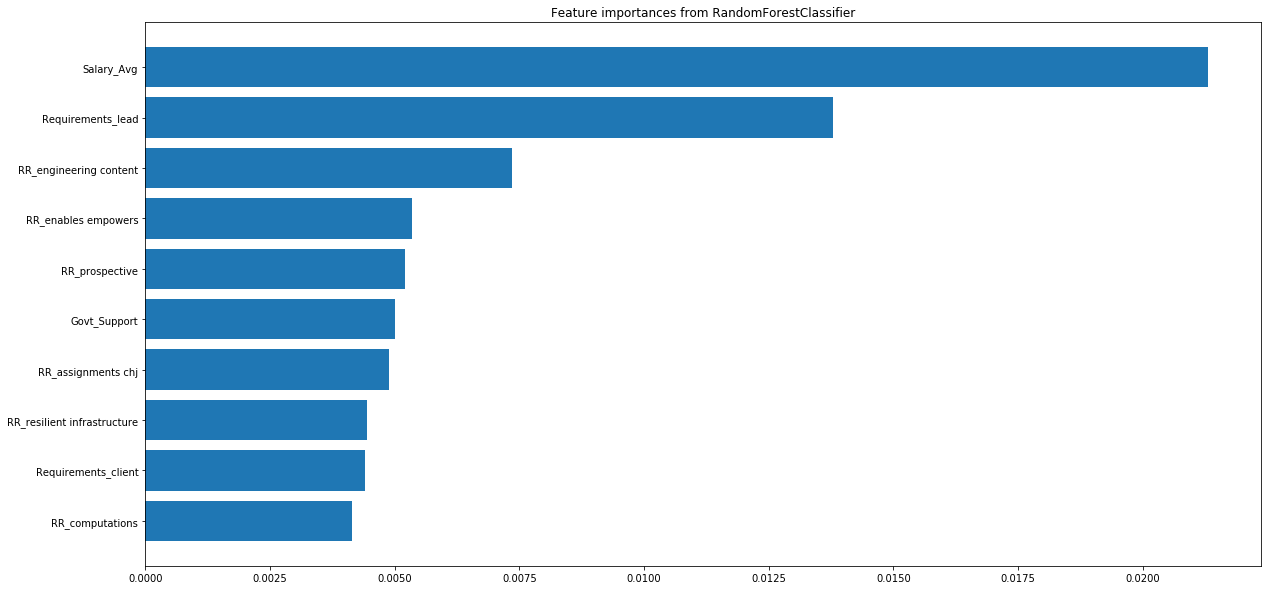

In [41]:
### Plot feature importance
rdf4_plot = pd.DataFrame(rdf4.feature_importances_, index=X_train.columns, columns=['Value']).sort_values(['Value'], ascending=True)
plt.figure(figsize=(20, 10))
plt.barh(y=rdf4_plot.index.values[-10:], width=rdf4_plot['Value'].values[-10:] )
plt.title('Feature importances from RandomForestClassifier')

In [42]:
print ('It seems that one of the strongest features that is indicative of management level jobs is Salary_Avg. Which makes sense since from part 1"s boxplot we can see that management level people garner a substantially higher amount of pay. Next, the keywords that appear for management level jobs are usually leadership qualities related. Which suggests that these jobs are likely looking for more leadership skills than hard technical skills.')

It seems that one of the strongest features that is indicative of management level jobs is Salary_Avg. Which makes sense since from part 1"s boxplot we can see that management level people garner a substantially higher amount of pay. Next, the keywords that appear for management level jobs are usually leadership qualities related. Which suggests that these jobs are likely looking for more leadership skills than hard technical skills.


In [43]:
### Quickly run the data through an NN to see how it matches up
import keras
from keras.models import Sequential
from keras.layers import Dense

### Setting up the neural network
classifier = Sequential()
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
# classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, nb_epoch = 100, batch_size= 16)

C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=28760, units=16, kernel_initializer="uniform")`
  
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PaulY\Anaconda3\envs\NLPTensorEnv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/100
2047/2047 [==============================] - 2s 1ms/step - loss: 0.4765 - acc: 0.9003
Epoch 2/100
2047/2047 [==============================] - 2s 932us/step - loss: 0.4562 - acc: 0.9003
Epoch 3/100
2047/2047 [==============================] - 2s 930us/step - loss: 0.4332 - acc: 0.9003
Epoch 4/100
2047/2047 [==============================] - 2s 936us/step - loss: 0.3912 - acc: 0.9003
Epoch 5/100
2047/2047 [==============================] - 2s 923us/step - loss: 0.3083 - acc: 0.9003
Epoch 6/100
2047/2047 [==============================] - 2s 934us/step - loss: 0.3365 - acc: 0.9003
Epoch 7/100
2047/2047 [==============================] - 2s 928us/step - loss: 0.2223 - acc: 0.9003
Epoch 8/100
2047/2047 [==============================] - 2s 926us/step - loss: 0.1961 - acc: 0.9003 0s - loss: 0.1894 - acc
Epoch 9/100
2047/2047 [==============================] - 2s 928us/step - loss: 0.2000 - acc: 0.9003
Epoch 10/100
2047/2047 [==============================] - 2s 923us/step - loss

2047/2047 [==============================] - 2s 945us/step - loss: 0.0563 - acc: 0.9790
Epoch 81/100
2047/2047 [==============================] - 2s 958us/step - loss: 0.0654 - acc: 0.9770
Epoch 82/100
2047/2047 [==============================] - 2s 936us/step - loss: 0.0651 - acc: 0.9770
Epoch 83/100
2047/2047 [==============================] - 2s 936us/step - loss: 0.0742 - acc: 0.9741
Epoch 84/100
2047/2047 [==============================] - 2s 950us/step - loss: 0.1183 - acc: 0.9472 0s - loss: 0.15
Epoch 85/100
2047/2047 [==============================] - 2s 934us/step - loss: 0.0548 - acc: 0.9800
Epoch 86/100
2047/2047 [==============================] - 2s 924us/step - loss: 0.0502 - acc: 0.9824
Epoch 87/100
2047/2047 [==============================] - 2s 956us/step - loss: 0.0522 - acc: 0.9805
Epoch 88/100
2047/2047 [==============================] - 2s 933us/step - loss: 0.0503 - acc: 0.9809
Epoch 89/100
2047/2047 [==============================] - 2s 933us/step - loss: 0.0512 -

In [47]:
cm = confusion_matrix(y_test, classifier.predict_classes(X_test), labels= [1,0])
print (classification_report(y_test, classifier.predict_classes(X_test)))
cm = pd.DataFrame(cm, index=['True_High','True_Low'], columns = ['Pred_High','Pred_Low'])

### Find and Print AUC
fpr, tpr, _ = roc_curve(y_test, pd.DataFrame(classifier.predict_proba(X_test)).iloc[:,0])
roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

print ('\nANN is able to do a better job, but it still doesn"t have feature importance...')

cm


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       200
           1       0.71      0.18      0.29        28

   micro avg       0.89      0.89      0.89       228
   macro avg       0.81      0.58      0.61       228
weighted avg       0.87      0.89      0.86       228

AUC: 0.7966964285714285

ANN is able to do a better job, but it still doesn"t have feature importance...


,Pred_High,Pred_Low
True_High,5,23
True_Low,2,198


# In Summary

In summary, we categorized the average salary in seniority levels and assigning high salary to those that are about the 55th percentile of their respective categories. In doing so, we are able to achieve a relatively high degree of certainty in identifying higher paying / high salary jobs (AUC > 0.8). 

While we can skipped the categorizing of salaries into seniority levels part, the end result will make no sense, as for example, we definitely know that senior management makes substaintially as compared to a fresh grad and they will be flagged as high paying jobs. But that information doesn't help a fresh grad identify higher paying jobs in his/her job grads.

#### On Models used

The main model of choice this time round is RandomForestClassifier as it provides us with feature importances information to ponder on. ANN is another model used in the analysis. While ANN gave slightly lower AUC score and accuracy, it took a significant less time and computing resource (Grid Searching RDF took an incredebly long time) to reach a similar level of efficacy as RandomForestClassifier. As such, if make good predictions is the only concern and resources are tight. Use ANN.

#### In review for Bonus question

Since it is mentioned that, our boss would VERY MUCH LIKE TO AVOID telling a client that a job is a high salary one when it is indeed low salary. We amped up the probability threshold till a point where the precision of predicting high salary in the train set is 1 / 100% / perfect. 

In that sense, although we might wrongly predict a high salary job as low salary, nobody will actually blame the headhunter for these kinds of 'good/happy mistakes'. Furthermore, when we predict a job as a high salary, we will only be wrong very infrequently

#### Factors distinguishing job categories

##### Data Scientist vs Others

Since there is only a small occurance of of 'Data Scientist' Job_Titles (<3%) , we are dealing we a serious class imbalance here. 

That said, that still yielded us a relatively decent AUC, precision, and recall accross both train / training and test sets. 

Extracting the feature importance tells us that Data Scientist jobs often require data science related technical skills such as 'tensorflow', 'deep learning', 'machine learning', 'python', etc. Which makes sense, but most importantly, it tells us that emplyoers are looking for hard skills as apposed to soft skills or other skill sets.

##### Management vs Non-Management

Simiar to part 2.0, class imbalance, though, not as serious as before (~10%). That said, we can still extract feature importance from it. 

The feature importance output suggests that regardless of Job Titles, etc. Recruiters are looking for soft skills / leadership skills to hire for Management level jobs. Meaning, one would need to focus on and prove that these skills are present in yourself in order to score the job.

Knowing this will help one position oneself for the true requirements of a job.
